In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Fruit	Euclidean	Manhattan	Minkowski	Label
[170, 5]	5.02		5.50		5.00		Orange
[160, 6]	5.02		5.50		5.00		Apple
[180, 7]	15.07		16.50		15.00		Apple
[150, 4]	15.07		16.50		15.00		Orange
[140, 3]	25.12		27.50		25.01		Orange
[200, 6]	35.00		35.50		35.00		Apple

Predicted Fruit Type for [165, 5.5]: Apple


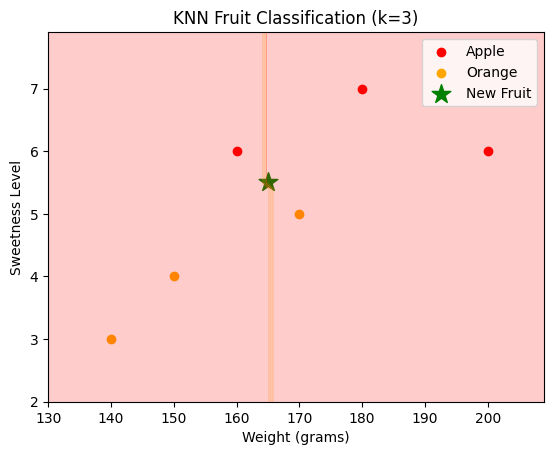

In [1]:
import math
import matplotlib.pyplot as plt

# Dataset
fruits = [
    [180, 7, 'Apple'],
    [200, 6, 'Apple'],
    [150, 4, 'Orange'],
    [170, 5, 'Orange'],
    [160, 6, 'Apple'],
    [140, 3, 'Orange']
]

new_fruit = [165, 5.5]
k = 3

# Distance functions
def euclidean(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

def manhattan(p1, p2):
    return sum(abs(a - b) for a, b in zip(p1, p2))

def minkowski(p1, p2, p=3):
    return sum(abs(a - b) ** p for a, b in zip(p1, p2)) ** (1 / p)

# Compute distances
distances = []
for f in fruits:
    features = f[:2]
    label = f[2]
    euc = euclidean(features, new_fruit)
    man = manhattan(features, new_fruit)
    min3 = minkowski(features, new_fruit)
    distances.append((features, label, euc, man, min3))

# Sort by Euclidean distance
distances.sort(key=lambda x: x[2])
print("Fruit\tEuclidean\tManhattan\tMinkowski\tLabel")
for d in distances:
    print(f"{d[0]}\t{d[2]:.2f}\t\t{d[3]:.2f}\t\t{d[4]:.2f}\t\t{d[1]}")

# KNN classification
k_nearest = distances[:k]
labels = [d[1] for d in k_nearest]
predicted = max(set(labels), key=labels.count)
print(f"\nPredicted Fruit Type for {new_fruit}: {predicted}")

# Plotting
for f in fruits:
    color = 'red' if f[2] == 'Apple' else 'orange'
    plt.scatter(f[0], f[1], color=color, label=f[2] if f[2] not in plt.gca().get_legend_handles_labels()[1] else "")

# New fruit
plt.scatter(new_fruit[0], new_fruit[1], color='green', marker='*', s=200, label='New Fruit')

# Decision boundary (approximation)
import numpy as np
x_min, x_max = 130, 210
y_min, y_max = 2, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.1))

Z = []
for i in range(xx.shape[0]):
    row = []
    for j in range(xx.shape[1]):
        point = [xx[i, j], yy[i, j]]
        temp = sorted(fruits, key=lambda f: euclidean(f[:2], point))[:k]
        label = max(set([f[2] for f in temp]), key=[f[2] for f in temp].count)
        row.append(0 if label == 'Apple' else 1)
    Z.append(row)
Z = np.array(Z)

plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'orange'])
plt.xlabel("Weight (grams)")
plt.ylabel("Sweetness Level")
plt.legend()
plt.title("KNN Fruit Classification (k=3)")
plt.show()


In [ ]:
iris_data = [
    [1.4, 0.2, 'Setosa'],
    [1.3, 0.3, 'Setosa'],
    [1.5, 0.2, 'Setosa'],
    [4.7, 1.4, 'Versicolor'],
    [4.5, 1.5, 'Versicolor'],
    [4.9, 1.5, 'Versicolor']
]

# Display dataset
print("ID\tPetal Length\tPetal Width\tSpecies")
for i, flower in enumerate(iris_data, start=1):
    print(f"{i}\t{flower[0]}\t\t{flower[1]}\t\t{flower[2]}")

In [ ]:
def euc(p1,p2):
    return math.sqrt(sum((a-b)**2 for a,b in zip(p1,p2)))
d=[]
for p in iris_data:
    p1=p[:2]
    p2=[1.6,0.2]
    dist=euc(p1,p2)
    d.append([p2,p[-1],dist])


In [ ]:
import math

In [ ]:
d.sort(key=lambda x: x[2])

print("Point\t\tSpecies\t\tDistance")
for p in d:
    print(f"{p[0]}\t{p[1]}\t\t{p[2]:.2f}")


In [ ]:
d=d[:3]
count={}
for i in d:
    label=i[1]
    if label in count:
        count[label]+=1
    else:
        count[label]=1
print(max(count))

In [ ]:
import math
from collections import Counter

# ------------------------------
# 1. ENTROPY FUNCTION
# ------------------------------
def entropy(data):
    labels = [row[-1] for row in data]  # get target column
    label_counts = Counter(labels)
    total = len(data)
    ent = 0
    for count in label_counts.values():
        p = count / total
        ent -= p * math.log2(p)
    return ent


# ------------------------------
# 2. INFORMATION GAIN FUNCTION
# ------------------------------
def info_gain(data, feature_index):
    total_entropy = entropy(data)
    values = set(row[feature_index] for row in data)
    weighted_entropy = 0

    for value in values:
        subset = [row for row in data if row[feature_index] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)

    gain = total_entropy - weighted_entropy
    return gain


# ------------------------------
# 3. BEST FEATURE TO SPLIT
# ------------------------------
def best_feature(data):
    features = len(data[0]) - 1  # exclude target
    gains = [info_gain(data, i) for i in range(features)]
    best = gains.index(max(gains))
    return best


# ------------------------------
# 4. BUILD DECISION TREE (ID3)
# ------------------------------
def id3(data, feature_names):
    labels = [row[-1] for row in data]

    # If all labels are same → return that label
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    # If no features left → return majority label
    if len(feature_names) == 0:
        return Counter(labels).most_common(1)[0][0]

    # Choose best feature
    best = best_feature(data)
    best_name = feature_names[best]
    tree = {best_name: {}}

    # Split data based on best feature values
    for value in set(row[best] for row in data):
        subset = [row[:best] + row[best+1:] for row in data if row[best] == value]
        new_features = feature_names[:best] + feature_names[best+1:]
        subtree = id3(subset, new_features)
        tree[best_name][value] = subtree

    return tree


# ------------------------------
# 5. PREDICTION FUNCTION
# ------------------------------
def predict(tree, sample):
    feature = next(iter(tree))
    feature_value = sample.get(feature)

    if feature_value not in tree[feature]:
        return None  # unseen value case

    branch = tree[feature][feature_value]
    if isinstance(branch, dict):
        return predict(branch, sample)
    else:
        return branch


# ------------------------------
# 6. MAIN PROGRAM
# ------------------------------

# Dataset: Age, Blood Pressure, Cholesterol, Diagnosis
data = [
    [30, "High", "High", "Sick"],
    [45, "Low", "Normal", "Healthy"],
    [50, "High", "High", "Sick"],
    [35, "Low", "Normal", "Healthy"],
    [60, "High", "High", "Sick"],
    [55, "Low", "Normal", "Healthy"],
    [40, "High", "High", "Sick"],
    [25, "Low", "Normal", "Healthy"],
    [65, "High", "High", "Sick"],
    [45, "Low", "Normal", "Healthy"]
]

feature_names = ["Age", "Blood Pressure", "Cholesterol"]

# Build Decision Tree
tree = id3(data, feature_names)
print("Decision Tree:\n", tree)

# Predict new patient
sample = {"Age": 50, "Blood Pressure": "Low", "Cholesterol": "Normal"}
result = predict(tree, sample)
print("\nNew Patient:", sample)
print("Predicted Diagnosis:", result)


In [ ]:
import pandas as pd
import math

# -------------------------------
# STEP 1: Dataset
# -------------------------------
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast',
                'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                    'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

In [ ]:
def gini(subset):
    total=len(subset)
    if total==0:
        return 0
    values=subset["PlayTennis"].value_counts()
    gini=1-sum((count/total)**2 for count in values)
    return gini
def gini_impurity(data,attribute):
    total=len(data)
    values=data[attribute].unique()
    weighted=0
    for v in values:
        subset=data[data[attribute]==v]
        weighted+=len(subset)/total * gini(subset)
    return weighted
def best_split(data):
    gini_values={}
    for i in data.columns[:-1]:
        gini_values[i]=gini_impurity(data,i)
    best_attr=min(gini_values,key=gini_values.get)
    return best_attr,gini_values
def build_tree(data,depth=0):
    if len(data['PlayTennis'].unique())==1:
        return data['PlayTennis'].iloc[0]
    if len(data.columns) == 1:
        return data['PlayTennis'].mode()[0]
    best_attr,gini_vals=best_split(data)
    tree={best_attr:{}}
    for val in data[best_attr].unique():
        subset = data[data[best_attr] == val].drop(columns=[best_attr])
        tree[best_attr][val] = build_tree(subset, depth + 1)
    return tree
def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree  # leaf node
    
    attr = next(iter(tree))
    value = sample.get(attr)
    if value not in tree[attr]:
        return "Unknown"  # unseen value
    return predict(tree[attr][value], sample)

# -------------------------------
# STEP 6: Run & Display Results
# -------------------------------
cart_tree = build_tree(data)
print("Decision Tree (CART based on Gini):")
print(cart_tree)

# Classify a new sample
sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}
result = predict(cart_tree, sample)
print("\nPrediction for new sample:", result)

In [ ]:
#kmeans


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Distance functions ----------
def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def minkowski(a, b, p=3):
    return np.sum(np.abs(a - b)**p)**(1/p)

# ---------- K-Means algorithm ----------
def kmeans(data, k, distance_func, max_iters=100):
    np.random.seed(0)
    centroids = data[np.random.choice(len(data), k, replace=False)]
    for _ in range(max_iters):
        # Assign each point to nearest centroid
        clusters = []
        for x in data:
            dists = [distance_func(x, c) for c in centroids]
            clusters.append(np.argmin(dists))
        clusters = np.array(clusters)
        
        # Update centroids
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        
        # Stop if converged
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    # Compute SSE
    sse = 0
    for i in range(len(data)):
        sse += distance_func(data[i], centroids[clusters[i]])**2
    return clusters, centroids, sse

# ---------- Main function ----------
def run_kmeans(distance_func, name):
    # You can replace this with: df = pd.read_csv("your_dataset.csv")
    df = pd.DataFrame({
        'Points': np.random.randint(5, 30, 20),
        'Assists': np.random.randint(1, 10, 20),
        'Rebounds': np.random.randint(2, 15, 20)
    })
    data = df[['Points', 'Assists', 'Rebounds']].values

    sse_list = []
    K_values = [1, 2, 3, 4]

    for k in K_values:
        clusters, centroids, sse = kmeans(data, k, distance_func)
        sse_list.append(sse)

        # Plot clusters (using first two features)
        plt.scatter(data[:,0], data[:,1], c=clusters)
        plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x')
        plt.title(f"K={k} ({name} distance)")
        plt.xlabel('Points')
        plt.ylabel('Assists')
        plt.show()

    # Plot K vs SSE (Elbow method)
    plt.plot(K_values, sse_list, marker='o')
    plt.title(f"Elbow Method ({name} Distance)")
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('SSE')
    plt.show()

# ---------- Run for all distances ----------
run_kmeans(euclidean, "Euclidean")
run_kmeans(manhattan, "Manhattan")
run_kmeans(lambda a, b: minkowski(a, b, 3), "Minkowski")


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
def euc(a,b):
    return np.sqrt(np.sum((a-b)**2))

def kmeans(data,k,max_iters=100):
    np.random.seed(0)
    centroids=data[np.random.choice(len(data),k,replace=False)]
    for _ in range(max_iters):
        clusters=[]
        for x in data:
            temp=[euc(x,k)for k in centroids]
            clusters.append(np.argmin(temp))
        clusters=np.array(clusters)
        new_centroids=np.array([data[clusters==i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids,new_centroids):
            break
        centroids=new_centroids
    sse=0
    for i in range(len(data)):
        sse+=euc(data[i],centroids[clusters[i]])**2
    return clusters,centroids,sse
# ------------------------------
# Example dataset (you can replace this with a CSV)
# ------------------------------
data = np.array([
    [1, 2],
    [1, 4],
    [3, 2],
    [10, 8],
    [11, 6],
    [12, 9]
])

# ------------------------------
# Try different values of k
# ------------------------------
K_values = [1, 2, 3, 4]
SSE = []

for k in K_values:
    clusters, centroids, sse = kmeans(data, k)
    SSE.append(sse)
    print(f"\nK = {k}")
    print("Centroids:\n", centroids)
    print("SSE =", sse)

    # Plot clusters (only for 2D data)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)
    plt.title(f"K-Means Clusters (k={k})")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# ------------------------------
# Elbow Method Plot
# ------------------------------
plt.plot(K_values, SSE, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame([
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Mild', 'High', 'Strong', 'No']
], columns=['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'])

def gini(subset):
    total = len(subset)
    if total == 0:
        return 0
    values = subset["PlayTennis"].value_counts()
    gini = 1 - sum((count / total) ** 2 for count in values)
    return gini


def gini_impurity(data, attribute):
    total = len(data)
    values = data[attribute].unique()
    weighted = 0
    for v in values:
        subset = data[data[attribute] == v]
        weighted += (len(subset) / total) * gini(subset)
    return weighted

def best_split(data):
    gini_values = {}
    for attr in data.columns[:-1]:  # ignore target column
        gini_values[attr] = gini_impurity(data, attr)
    best_attr = min(gini_values, key=gini_values.get)
    return best_attr, gini_values

def build_tree(data, depth=0):
    # if all same class
    if len(data['PlayTennis'].unique()) == 1:
        return data['PlayTennis'].iloc[0]
    
    # if no more attributes left
    if len(data.columns) <= 1:
        return data['PlayTennis'].mode()[0]
    
    best_attr, _ = best_split(data)
    tree = {best_attr: {}}
    
    for val in data[best_attr].unique():
        subset = data[data[best_attr] == val].drop(columns=[best_attr])
        if subset.empty:
            tree[best_attr][val] = data['PlayTennis'].mode()[0]
        else:
            tree[best_attr][val] = build_tree(subset, depth + 1)
    return tree

def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree  # leaf node
    
    attr = next(iter(tree))
    value = sample.get(attr)
    if value not in tree[attr]:
        return "Unknown"
    return predict(tree[attr][value], sample)

cart_tree = build_tree(data)
print("Decision Tree (CART using Gini Index):")
print(cart_tree)

# Test new sample
sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}
result = predict(cart_tree, sample)
print("\nPrediction for new sample:", result)


In [ ]:
import pandas as pd

data = pd.DataFrame([
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rainy', 'Cool', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'Normal', 'Strong', 'Yes']
], columns=['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'])

print(data)


In [ ]:
def gini(data):
    total=len(data)
    if total==0:
        return 0
    c=data["PlayTennis"].value_counts()
    return 1- sum((count/total) for count in c)
    

In [ ]:
def gini_impurity(data,attribute):
    total=len(data)
    weighted=0
    values=data[attribute].unique()
    for v in values:
        subset=data[data[attribute]==v]
        weighted+=(len(subset)/total * gini(subset))
    return weighted

In [ ]:
def best_split(data):
    gini_values={}
    for attr in data.columns[:-1]:
        gini_values[attr]=gini_impurity(data,attr)
    best_attr=min(gini_values,key=gini_values.get)
    return best_attr,gini_values

In [ ]:
def build_tree(data, depth=0):
    if len(data["PlayTennis"].unique()) == 1:
        return data["PlayTennis"].iloc[0]

    if len(data.columns) <= 1:
        return data["PlayTennis"].mode()[0]

    best_attr, _ = best_split(data)
    tree = {best_attr: {}}

    for val in data[best_attr].unique():
        subset = data[data[best_attr] == val].drop(columns=[best_attr])
        if subset.empty:
            tree[best_attr][val] = data["PlayTennis"].mode()[0]
        else:
            tree[best_attr][val] = build_tree(subset, depth + 1)
    return tree


def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree

    attr = next(iter(tree))
    value = sample.get(attr)
    if value not in tree[attr]:
        return "Unknown"

    return predict(tree[attr][value], sample)


In [ ]:
cart_tree = build_tree(data)
print("Decision Tree (CART using Gini Index):")
print(cart_tree)

# Test new sample
sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}
result = predict(cart_tree, sample)
print("\nPrediction for new sample:", result)

In [ ]:
import pandas as pd
import numpy as np

# -------------------------
# STEP 1: Dataset
# -------------------------
data = pd.DataFrame([
    [30, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy'],
    [50, 'High', 'High', 'Sick'],
    [35, 'Low', 'Normal', 'Healthy'],
    [60, 'High', 'High', 'Sick'],
    [55, 'Low', 'Normal', 'Healthy'],
    [40, 'High', 'High', 'Sick'],
    [25, 'Low', 'Normal', 'Healthy'],
    [65, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy']
], columns=['Age', 'BloodPressure', 'Cholesterol', 'Diagnosis'])


# Discretize Age into two categories
data['Age'] = data['Age'].apply(lambda x: 'Old' if x > 45 else 'Young')

# -------------------------
# STEP 2: Entropy Function
# -------------------------
def entropy(subset):
    total = len(subset)
    if total == 0:
        return 0
    values = subset['Diagnosis'].value_counts()
    return -sum((count/total)*np.log2(count/total) for count in values)

# -------------------------
# STEP 3: Info Gain Function
# -------------------------
def info_gain(data, attribute):
    total_entropy = entropy(data)
    values = data[attribute].unique()
    weighted_entropy = 0
    for v in values:
        subset = data[data[attribute] == v]
        weighted_entropy += (len(subset)/len(data)) * entropy(subset)
    return total_entropy - weighted_entropy

# -------------------------
# STEP 4: Find Best Split
# -------------------------
def best_split(data):
    gains = {}
    for attr in data.columns[:-1]:
        gains[attr] = info_gain(data, attr)
    best_attr = max(gains, key=gains.get)
    return best_attr, gains

# -------------------------
# STEP 5: Build Tree (Recursive)
# -------------------------
def build_tree(data, depth=0):
    if len(data['Diagnosis'].unique()) == 1:
        return data['Diagnosis'].iloc[0]
    if len(data.columns) <= 1:
        return data['Diagnosis'].mode()[0]

    best_attr, _ = best_split(data)
    tree = {best_attr: {}}

    for val in data[best_attr].unique():
        subset = data[data[best_attr] == val].drop(columns=[best_attr])
        if subset.empty:
            tree[best_attr][val] = data['Diagnosis'].mode()[0]
        else:
            tree[best_attr][val] = build_tree(subset, depth+1)
    return tree

# -------------------------
# STEP 6: Prediction Function
# -------------------------
def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree
    attr = next(iter(tree))
    value = sample.get(attr)
    if value not in tree[attr]:
        return "Unknown"
    return predict(tree[attr][value], sample)

# -------------------------
# STEP 7: Run Everything
# -------------------------
print("Data:\n", data)
root, gains = best_split(data)
print("\nInformation Gain per Attribute:")
for k, v in gains.items():
    print(f"{k}: {v:.4f}")

print(f"\nBest attribute to split on: {root}")

tree = build_tree(data)
print("\nDecision Tree (ID3 based on Entropy):")
print(tree)

# Predict new patient
sample = {'Age': 'Old', 'BloodPressure': 'Low', 'Cholesterol': 'Normal'}
prediction = predict(tree, sample)
print("\nPrediction for new sample:", prediction)


In [ ]:
import pandas as pd
import numpy as np

# ---------------------------------------
# Step 1: Create the dataset
# ---------------------------------------
data = pd.DataFrame({
    'Outlook':    ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain'],
    'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild'],
    'Humidity':   ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal'],
    'Wind':       ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak'],
    'PlayTennis': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes']
})

# ---------------------------------------
# Step 2: Entropy function
# ---------------------------------------
def entropy(data):
    values = data['PlayTennis'].value_counts(normalize=True)
    return -sum(p * np.log2(p) for p in values)

# ---------------------------------------
# Step 3: Info gain and gain ratio
# ---------------------------------------
def info_gain_ratio(data, attribute):
    total_entropy = entropy(data)
    values = data[attribute].unique()
    weighted_entropy = 0
    split_info = 0
    
    for v in values:
        subset = data[data[attribute] == v]
        p = len(subset) / len(data)
        weighted_entropy += p * entropy(subset)
        split_info -= p * np.log2(p) if p > 0 else 0
    
    info_gain = total_entropy - weighted_entropy
    gain_ratio = info_gain / split_info if split_info != 0 else 0
    return gain_ratio

# ---------------------------------------
# Step 4: Best split (C4.5 chooses max gain ratio)
# ---------------------------------------
def best_split(data):
    ratios = {attr: info_gain_ratio(data, attr) for attr in data.columns[:-1]}
    best_attr = max(ratios, key=ratios.get)
    return best_attr, ratios

# ---------------------------------------
# Step 5: Build tree recursively
# ---------------------------------------
def build_tree(data):
    # If all are same class
    if len(data['PlayTennis'].unique()) == 1:
        return data['PlayTennis'].iloc[0]
    
    # If no attributes left
    if len(data.columns) == 1:
        return data['PlayTennis'].mode()[0]
    
    best_attr, _ = best_split(data)
    tree = {best_attr: {}}
    
    for val in data[best_attr].unique():
        subset = data[data[best_attr] == val].drop(columns=[best_attr])
        if subset.empty:
            tree[best_attr][val] = data['PlayTennis'].mode()[0]
        else:
            tree[best_attr][val] = build_tree(subset)
    return tree

# ---------------------------------------
# Step 6: Predict function
# ---------------------------------------
def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree
    attr = next(iter(tree))
    value = sample.get(attr)
    if value not in tree[attr]:
        return "Unknown"
    return predict(tree[attr][value], sample)

# ---------------------------------------
# Step 7: Run it
# ---------------------------------------
tree = build_tree(data)
print("\nC4.5 Decision Tree:\n", tree)

# Test new sample
sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Weak'}
print("\nPrediction for sample:", sample)
print("=>", predict(tree, sample))


In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Outlook':    ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain'],
    'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild'],
    'Humidity':   ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal'],
    'Wind':       ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak'],
    'PlayTennis': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes']
})
print(data)


def entropy(data):
    total=len(data)
    if total==0:
        
        return 0
    value=data["PlayTennis"].value_counts()
    return -sum((v/total*np.log2(v/total)) for v in value)
def impurity(data,attribute):
    total=len(data)
    total_entropy=entropy(data)
    weighted=0
    value=data[attribute].unique()
    for v in value:
        subset=data[data[attribute]==v]
        weighted+=(len(subset)/total*entropy(subset))
    return total_entropy-weighted
def best_split(data):
    en_values={}
    for i in data.columns[:-1]:
        en_values[i]=impurity(data,i)
    best_attr=max(en_values,key=en_values.get)
    return best_attr,en_values
def build_tree(data,depth=0):
    if len(data["PlayTennis"].unique())==1:
        return data["PlayTennis"].iloc[0]
    if len(data.columns)<=1:
        return data["PlayTennis"].mode()[0]
    best_attr,_=best_split(data)
    tree={best_attr:{}}
    for v in data[best_attr].unique():
        subset=data[data[best_attr]==v].drop(columns=[best_attr])
        if subset.empty:
            tree[best_attr][v]=data["PlayTennis"].mode()[0]

        else:
            tree[best_attr][v]=build_tree(subset,depth+1)
    return tree
def predict(tree,sample):
    if not isinstance(tree,dict):
        return tree
    attr=next(iter(tree))
    value=sample.get(attr)
    if value not in tree[attr]:
        return "Unknown"
    return predict(tree[attr][value],sample)
tree = build_tree(data)
print("\nDecision Tree (ID3):\n", tree)

sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Weak'}
print("\nPrediction for sample:", sample)
print("=>", predict(tree, sample))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# -------------------------------------
# Step 1: Create the Dataset
# -------------------------------------
points = np.array([
    [1, 1],
    [2, 1],
    [4, 3],
    [5, 4]
])

labels = ['P1', 'P2', 'P3', 'P4']

# -------------------------------------
# Step 2: Plot Scatter
# -------------------------------------
plt.scatter(points[:,0], points[:,1], color='blue')
for i, txt in enumerate(labels):
    plt.text(points[i,0]+0.05, points[i,1]+0.05, txt)
plt.title("Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# -------------------------------------
# Step 3: Distance Matrices
# -------------------------------------
def show_distance_matrix(points, metric):
    dist = squareform(pdist(points, metric=metric))
    df = pd.DataFrame(dist, index=labels, columns=labels)
    print(f"\nProximity Matrix ({metric.title()} Distance):\n", df.round(2))

show_distance_matrix(points, 'euclidean')
show_distance_matrix(points, 'cityblock')  # Manhattan
show_distance_matrix(points, 'minkowski')  # Default p=2 same as Euclidean

# -------------------------------------
# Step 4: Dendrograms for Linkages
# -------------------------------------
methods = ['single', 'complete', 'average']

for method in methods:
    Z = linkage(points, method=method, metric='euclidean')
    plt.figure()
    dendrogram(Z, labels=labels)
    plt.title(f"Hierarchical Clustering ({method.title()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x1=np.arange(-10,11,1)
x2=np.arange(-10,11,1)
X1,X2=np.meshgrid(x1,x2)
Z=1+2*X1+3*X2
plt.contour(X1,X2,Z,levels=[0],colors='black',linewidths=2)
plt.contourf(X1,X2,Z,levels=[-1000,0],colors=['red'],alpha=0.3)
plt.contourf(X1,X2,Z,levels=[0,1000],colors=['green'],alpha=0.3)
plt.title('Hyperplane: 1 + 2X1 + 3X2 = 0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

# Find slope and intercept:
# Equation: 3X2 = -1 - 2X1
# X2 = (-2/3)*X1 - 1/3
slope = -2/3
intercept = -1/3
print(f"Slope: {slope}, Intercept: {intercept}")

In [ ]:
import numpy as np
import pandas as pd

# -------------------------------------
# Step 1: Create a simple dataset
# -------------------------------------
data = {
    'X1': [1, 2, 3, 6, 7, 8],
    'X2': [1, 1, 2, 6, 7, 8],
    'Label': ['A', 'A', 'A', 'B', 'B', 'B']
}

df = pd.DataFrame(data)
print("Training Data:\n", df)

# -------------------------------------
# Step 2: Define Euclidean distance function
# -------------------------------------
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# -------------------------------------
# Step 3: Define KNN function
# -------------------------------------
def knn_predict(X_train, y_train, test_point, k=3):
    distances = []
    
    # Calculate distance from test point to all training points
    for i in range(len(X_train)):
        dist = euclidean_distance(test_point, X_train[i])
        distances.append((dist, y_train[i]))
    
    # Sort by distance
    distances.sort(key=lambda x: x[0])
    
    # Pick k nearest neighbors
    neighbors = [label for _, label in distances[:k]]
    
    # Majority vote
    prediction = max(set(neighbors), key=neighbors.count)
    return prediction

# -------------------------------------
# Step 4: Test with a new point
# -------------------------------------
X_train = df[['X1', 'X2']].values
y_train = df['Label'].values
test_point = np.array([5, 5])  # new unseen point

k = 3
predicted_class = knn_predict(X_train, y_train, test_point, k)

print(f"\nTest Point: {test_point}")
print(f"Predicted Class (k={k}):", predicted_class)

# -------------------------------------
# Step 5: Plot for visualization
# -------------------------------------
import matplotlib.pyplot as plt

# Plot data points
for label, color in [('A', 'red'), ('B', 'blue')]:
    subset = df[df['Label'] == label]
    plt.scatter(subset['X1'], subset['X2'], c=color, label=f'Class {label}')

# Plot test point
plt.scatter(test_point[0], test_point[1], c='green', marker='*', s=200, label='Test Point')

plt.title(f"Manual KNN (k={k})")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import numpy as np

In [14]:
import pandas as pd

data = pd.DataFrame({
    'Weight': [120, 85, 90, 150, 160, 95, 100, 200, 220, 130],
    'Size':   [6.2, 5.1, 5.5, 7.0, 7.5, 5.3, 5.8, 8.0, 8.2, 6.5],
    'Sweetness': ['High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'High']
})

def euc(p1,p2):
    return np.sqrt(np.sum((a-b)**2 for a,b in zip(p1,p2)))

print(data)
x=data[["Weight","Size"]].values
y=data["Sweetness"].values
def knn(test):
    distance=[]
    for i in range(len(x)):
        dist=euc(test,x[i])
        distance.append((dist,y[i]))

    distance.sort(key=lambda x:x[0])
    knn=distance[:3]
    count={}
    for k in knn:
        count[k[1]]=1+count.get(k[1],0)
    label=max(count,key=count.get)
    return label
test=np.array([140,6.8])
l=knn(test)
print(l)
        

   Weight  Size Sweetness
0     120   6.2      High
1      85   5.1       Low
2      90   5.5       Low
3     150   7.0      High
4     160   7.5      High
5      95   5.3       Low
6     100   5.8       Low
7     200   8.0      High
8     220   8.2      High
9     130   6.5      High
High


/tmp/ipykernel_37/963186412.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sqrt(np.sum((a-b)**2 for a,b in zip(p1,p2)))


In [ ]:
import pandas as pd
import numpy as np

# Dataset
data = pd.DataFrame({
    'Outlook':    ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain'],
    'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild'],
    'Humidity':   ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal'],
    'Wind':       ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak'],
    'PlayTennis': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes']
})

print(data)

# ----------------- ENTROPY FUNCTION -----------------
def entropy(data):
    total = len(data)
    if total == 0:
        return 0
    value = data["PlayTennis"].value_counts()
    return -sum((v/total) * np.log2(v/total) for v in value)

# ----------------- INFORMATION GAIN -----------------
def info_gain(data, attribute):
    total_entropy = entropy(data)
    total = len(data)
    weighted = 0
    for val in data[attribute].unique():
        subset = data[data[attribute] == val]
        weighted += (len(subset)/total) * entropy(subset)
    return total_entropy - weighted

# ----------------- SPLIT INFORMATION -----------------
def split_info(data, attribute):
    total = len(data)
    split = 0
    for val in data[attribute].unique():
        subset = data[data[attribute] == val]
        ratio = len(subset)/total
        split -= ratio * np.log2(ratio)
    return split

# ----------------- GAIN RATIO (C4.5) -----------------
def gain_ratio(data, attribute):
    ig = info_gain(data, attribute)
    si = split_info(data, attribute)
    if si == 0:
        return 0
    return ig / si

# ----------------- BEST ATTRIBUTE -----------------
def best_split(data):
    ratios = {}
    for attr in data.columns[:-1]:
        ratios[attr] = gain_ratio(data, attr)
    best_attr = max(ratios, key=ratios.get)
    return best_attr, ratios

# ----------------- BUILD TREE -----------------
def build_tree(data, depth=0):
    if len(data["PlayTennis"].unique()) == 1:
        return data["PlayTennis"].iloc[0]
    if len(data.columns) <= 1:
        return data["PlayTennis"].mode()[0]

    best_attr, _ = best_split(data)
    tree = {best_attr: {}}

    for val in data[best_attr].unique():
        subset = data[data[best_attr] == val].drop(columns=[best_attr])
        if subset.empty:
            tree[best_attr][val] = data["PlayTennis"].mode()[0]
        else:
            tree[best_attr][val] = build_tree(subset, depth+1)
    return tree

# ----------------- PREDICT -----------------
def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree
    attr = next(iter(tree))
    value = sample.get(attr)
    if value not in tree[attr]:
        return "Unknown"
    return predict(tree[attr][value], sample)

# ----------------- RUN MODEL -----------------
tree = build_tree(data)
print("\nDecision Tree (C4.5):\n", tree)

sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Weak'}
print("\nPrediction for sample:", sample)
print("=>", predict(tree, sample))


In [5]:
import pandas as pd
import numpy as np

# Dataset
data = pd.DataFrame({
    'Outlook':    ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain'],
    'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild'],
    'Humidity':   ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal'],
    'Wind':       ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak'],
    'PlayTennis': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes']
})

print(data)
def entropy(data):
    total=len(data)
    if total==0:
        return 0
    values=data["PlayTennis"].value_counts()
    return -sum((count/total * np.log2(count/total)) for count in values)
def impurity(data,attribute):
    total_en=entropy(data)
    weighted=0
    total=len(data)
    for v in data[attribute].unique():
        subset=data[data[attribute]==v]
        weighted+=(len(subset)/total*entropy(subset))
    return total_en-weighted
def split_ratio(data,attribute):
    total=len(data)
    split=0
    for v in data[attribute].unique():
        subset=data[data[attribute]==v]
        ratio=len(subset)/total
        split-=ratio*np.log2(ratio)
    return split
def ratio(data,attribute):
    ig=impurity(data,attribute)
    si=split_ratio(data,attribute)
    if si==0:
        return 0
    return ig/si
def best_split(data):
    gain_value={}
    for i in data.columns[:-1]:
        gain_value[i]=ratio(data,i)
    best=max(gain_value,key=gain_value.get)
    return best
def build_tree(data,depth=0):
    if len(data['PlayTennis'].unique())==1:
        return data['PlayTennis'].iloc[0]

    if len(data.columns)<=1:
        return data['PlayTennis'].mode()[0]
    best=best_split(data)
    tree={best:{}}
    for v in data[best].unique():
        subset=data[data[best]==v].drop(columns=[best])
        if subset.empty:
            tree[best][v]=data["PlayTennis"].mode()[0]
        else:
            tree[best][v]=build_tree(subset,depth+1)
    return tree
def predict(tree,sample):
    if not isinstance(tree,dict):
        return tree
    attr=next(iter(tree))
    value=sample.get(attr)
    if value not in tree[attr]:
        return "ink"
    return predict(tree[attr][value],sample)
tree=build_tree(data)
sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Weak'}
print(predict(tree,sample))

    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes
5      Rain        Cool   Normal  Strong         No
6  Overcast        Cool   Normal  Strong        Yes
7     Sunny        Mild     High    Weak         No
8     Sunny        Cool   Normal    Weak        Yes
9      Rain        Mild   Normal    Weak        Yes
No


In [ ]:
import pandas as pd
import numpy as np

# --- Dataset ---
data = pd.DataFrame({
    'Outlook':    ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain'],
    'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild'],
    'Humidity':   ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal'],
    'Wind':       ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak'],
    'PlayTennis': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes']
})

# --- Gini Index ---
def gini(data):
    total = len(data)
    if total == 0:
        return 0
    counts = data['PlayTennis'].value_counts()
    gini_value = 1 - sum((count/total)**2 for count in counts)
    return gini_value

# --- Gini for Attribute Split ---
def gini_split(data, attribute):
    total = len(data)
    weighted_gini = 0
    for v in data[attribute].unique():
        subset = data[data[attribute] == v]
        weighted_gini += (len(subset)/total) * gini(subset)
    return weighted_gini

# --- Choose Best Attribute (lowest Gini) ---
def best_split(data):
    gini_values = {}
    for attr in data.columns[:-1]:
        gini_values[attr] = gini_split(data, attr)
    best_attr = min(gini_values, key=gini_values.get)
    return best_attr

# --- Build CART Tree ---
def build_tree(data, depth=0):
    if len(data['PlayTennis'].unique()) == 1:
        return data['PlayTennis'].iloc[0]
    if len(data.columns) <= 1:
        return data['PlayTennis'].mode()[0]
    
    best = best_split(data)
    tree = {best: {}}
    for v in data[best].unique():
        subset = data[data[best] == v].drop(columns=[best])
        if subset.empty:
            tree[best][v] = data['PlayTennis'].mode()[0]
        else:
            tree[best][v] = build_tree(subset, depth + 1)
    return tree

# --- Predict Function ---
def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree
    attr = next(iter(tree))
    value = sample.get(attr)
    if value not in tree[attr]:
        return "Unknown"
    return predict(tree[attr][value], sample)

# --- Run ---
tree = build_tree(data)
print("\nDecision Tree (CART):\n", tree)

sample = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Weak'}
print("\nPrediction for sample:", sample)
print("=>", predict(tree, sample))


In [6]:
import pandas as pd

# Small 2D dataset for K-Means
data = pd.DataFrame({
    'X': [1, 1.5, 3, 5, 3.5, 4.5, 3.8],
    'Y': [1, 2, 4, 7, 5, 5, 6]
})

print(data)


     X  Y
0  1.0  1
1  1.5  2
2  3.0  4
3  5.0  7
4  3.5  5
5  4.5  5
6  3.8  6


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

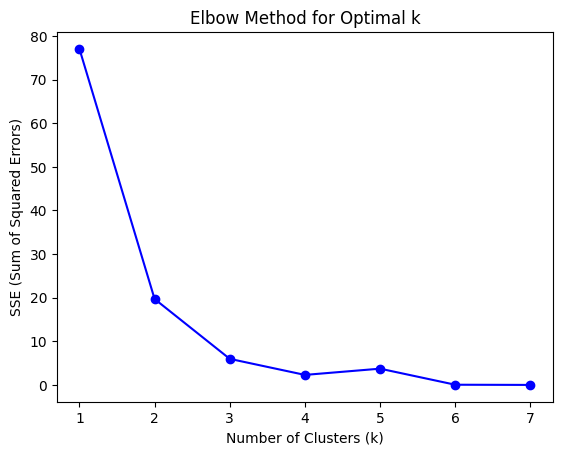

In [15]:
def euc(a,b):
    return np.sqrt(np.sum(a-b)**2)
def kmeans(data,k):
    data=np.array(data)
    centroids=data[np.random.choice(len(data),k,replace=False)]
    for _ in range(100):
        clusters=[]
        for i in range(len(data)):
            dist=[euc(data[i],centroids[j]) for j in range(k)]
            clusters.append(np.argmin(dist))
        clusters=np.array(clusters)
        new_centroids=np.array([data[clusters==i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids,new_centroids):
            break
        centroids=new_centroids
    sse=0
    for i in range(len(data)):
        sse+=(euc(data[i],centroids[clusters[i]])**2)
    return sse,centroids
sse_list = []
K = range(1, 8)

for k in K:
    sse, _ = kmeans(data, k)
    sse_list.append(sse)

# --- Plot Elbow Curve ---
plt.plot(K, sse_list, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k')
plt.show()

Data Points:
 [18 22 25 27 42 43]


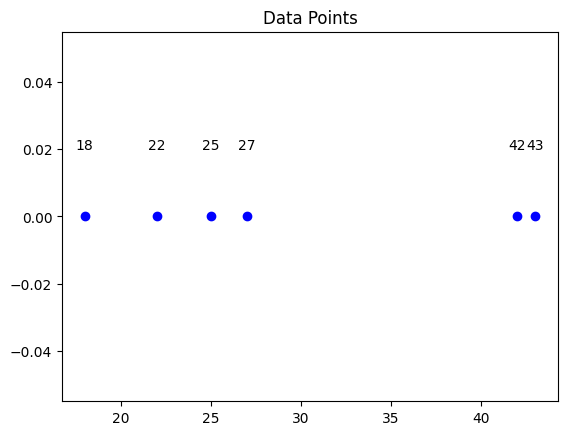


Euclidean Distance Matrix:
 [[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Manhattan Distance Matrix:
 [[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]

Minkowski (p=3) Distance Matrix:
 [[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]


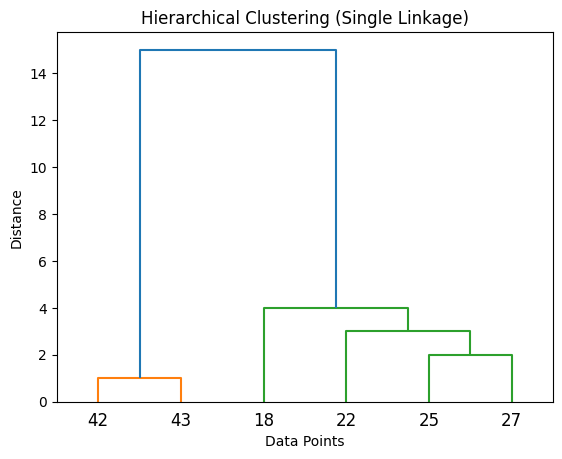

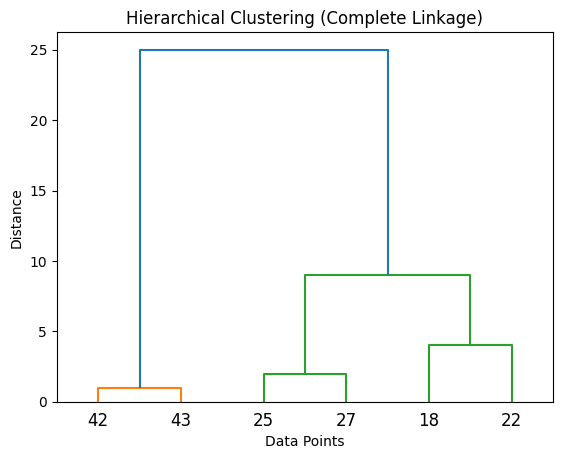

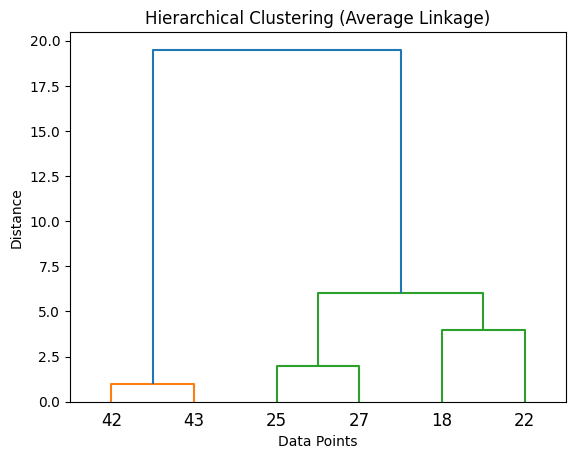

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# --- Data ---
data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)
print("Data Points:\n", data.flatten())

# --- Step 1: Plot data points ---
plt.scatter(data, np.zeros_like(data), color='blue')
for i, val in enumerate(data.flatten()):
    plt.text(val, 0.02, str(val), ha='center')
plt.title("Data Points")
plt.show()

# --- Step 2: Compute and display proximity matrices ---
def euclidean(a, b): return np.sqrt(np.sum((a - b)**2))
def manhattan(a, b): return np.sum(np.abs(a - b))
def minkowski(a, b, p=3): return np.sum(np.abs(a - b)**p)**(1/p)

n = len(data)
eucl = np.zeros((n, n))
manh = np.zeros((n, n))
mink = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        eucl[i, j] = euclidean(data[i], data[j])
        manh[i, j] = manhattan(data[i], data[j])
        mink[i, j] = minkowski(data[i], data[j])

print("\nEuclidean Distance Matrix:\n", np.round(eucl, 2))
print("\nManhattan Distance Matrix:\n", np.round(manh, 2))
print("\nMinkowski (p=3) Distance Matrix:\n", np.round(mink, 2))

# --- Step 3: Plot dendrograms ---
methods = ['single', 'complete', 'average']
for m in methods:
    linked = linkage(data, method=m, metric='euclidean')
    plt.figure()
    dendrogram(linked, labels=data.flatten())
    plt.title(f"Hierarchical Clustering ({m.capitalize()} Linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()
